Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Sistemas Discretos

### 1) Seja o sistema dinâmico modelado pela seguinte função de transferência:

$$
𝐻(𝑠) = \frac{5,265}{s² + 1,455s + 5,265}
$$


***
#### a) Convertê-lo para discreto com o período de amostragem Ts=0,01s

Resposta: 


Substituindo $ s $:

$$
s \approx \frac{2}{T} \cdot \frac{1 - z^{-1}}{1 + z^{-1}}
$$

Com $ T = 0,01s $, isso se torna:

$$
s \approx \frac{2}{0{,}01} \cdot \frac{1 - z^{-1}}{1 + z^{-1}} = 200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}
$$


Substituindo $ s $ em $ H(s) = \frac{5{,}265}{s^2 + 1{,}455s + 5{,}265} $:

$$
H(z) = \frac{5{,}265}{\left(200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}\right)^2 + 1{,}455 \cdot \left(200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}\right) + 5{,}265}
$$


Expandindo $ \left(200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}\right)^2 $:

$$
\left(200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}\right)^2 = 40000 \cdot \frac{(1 - z^{-1})^2}{(1 + z^{-1})^2}
$$

E para o termo linear:

$$
1{,}455 \cdot \left(200 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}\right) = 291 \cdot \frac{1 - z^{-1}}{1 + z^{-1}}
$$

Substituindo esses resultados na função de transferência:

$$
H(z) = \frac{5{,}265 \cdot (1 + z^{-1})^2}{40000 \cdot (1 - z^{-1})^2 + 291 \cdot (1 - z^{-1})(1 + z^{-1}) + 5{,}265 \cdot (1 + z^{-1})^2}
$$


Expandindo e simplificando os termos:

Numerador:

$$
5{,}265 \cdot (1 + z^{-1})^2 = 5{,}265 \cdot (1 + 2z^{-1} + z^{-2}) = 5{,}265 + 10{,}53z^{-1} + 5{,}265z^{-2}
$$

Denominador:

$$
40000 \cdot (1 - 2z^{-1} + z^{-2}) + 291 \cdot (1 - z^{-2}) + 5{,}265 + 10{,}53z^{-1} + 5{,}265z^{-2}
$$

Expandindo:

$$
40000 - 80000z^{-1} + 40000z^{-2} + 291 - 291z^{-2} + 5{,}265 + 10{,}53z^{-1} + 5{,}265z^{-2}
$$

Simplificando o denominador:

$$
(40000 + 291 + 5{,}265) + (-80000 + 10{,}53)z^{-1} + (40000 - 291 + 5{,}265)z^{-2}
$$

Isso resulta em:

$$
403{,}291 + (-79989{,}47)z^{-1} + 44874{,}265z^{-2}
$$


Agora, a função de transferência discreta pode ser expressa como:

$$
H(z) = \frac{5{,}265 + 10{,}53z^{-1} + 5{,}265z^{-2}}{403{,}291 - 79989{,}47z^{-1} + 44874{,}265z^{-2}}
$$

***
#### b) Estimar o overshoot e o tempo de acomodação do sistema discreto.


Resposta: 



A equação característica em $ s $ é dada por:

$$
s^2 + 2\zeta\omega_n s + \omega_n^2 = 0
$$

Comparando com os coeficientes da função de transferência contínua, temos:

$$
\zeta = \frac{1{,}455}{2\sqrt{5{,}265}} \approx 0{,}317
$$
$$
\omega_n = \sqrt{5{,}265} \approx 2{,}294
$$


   
O overshoot é dado pela fórmula:

$$
M_p = \exp\left(\frac{-\pi \zeta}{\sqrt{1 - \zeta^2}}\right) \times 100\%
$$

Substituindo $ \zeta = 0{,}317 $:

$$
M_p \approx \exp\left(\frac{-\pi \cdot 0{,}317}{\sqrt{1 - 0{,}317^2}}\right) \times 100\% \approx 48{,}34\%
$$




O tempo de acomodação pode ser estimado usando:

$$
t_s \approx \frac{4}{\zeta \omega_n}
$$

Para $ \zeta = 0{,}317 $ e $ \omega_n = 2{,}294 $:

$$
t_s \approx \frac{4}{0{,}317 \times 2{,}294} \approx 5{,}55 \text{ segundos}
$$

- **Overshoot estimado: $ M_p $** = 48,34%.
- **Tempo de Acomodação estimado: $ t_s $** = 5,55 segundos.

### 2) Obter um programa em Python para o sistema discreto do exercício 1. Simular uma entrada do tipo degrau com amplitude unitária e comparar as medidas de overshoot e tempo de acomodação obtidas com aquelas do exercício 1b.

Obtendo Sistema Discretro:

In [7]:
import control as ctrl

# Definindo a função de transferência contínua
num = [5.265]
den = [1, 1.455, 5.265]
H_s = ctrl.TransferFunction(num, den)

# Período de amostragem
T = 0.01

# Convertendo para função de transferência discreta
H_z = ctrl.c2d(H_s, T, method='zoh')

print("Sistema Discreto:")
print(H_z)


Sistema Discreto:
<TransferFunction>: sys[8]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.000262 z + 0.0002607
----------------------
z^2 - 1.985 z + 0.9856

dt = 0.01



Obtendo Equação das Diferenças:

In [8]:
# Obter os coeficientes do numerador e denominador
num_d = H_z.num[0][0]
den_d = H_z.den[0][0]

print(f"Coeficientes do numerador: {num_d}")
print(f"Coeficientes do denominador: {den_d}")

# Formatar a equação de diferenças
equation = "y[n] = "
for i, coef in enumerate(num_d):
    if i == 0:
        equation += f"{coef:.4f} * x[n-{i}]"
    else:
        equation += f" + {coef:.4f} * x[n-{i}]"

for i, coef in enumerate(den_d[1:], start=1):
    equation += f" - {coef:.4f} * y[n-{i}]"

print(f"Equação de diferenças: {equation}")

Coeficientes do numerador: [0.00026197 0.0002607 ]
Coeficientes do denominador: [ 1.         -1.98503267  0.98555534]
Equação de diferenças: y[n] = 0.0003 * x[n-0] + 0.0003 * x[n-1] - -1.9850 * y[n-1] - 0.9856 * y[n-2]


Obtendo Resposta ao Degrau:

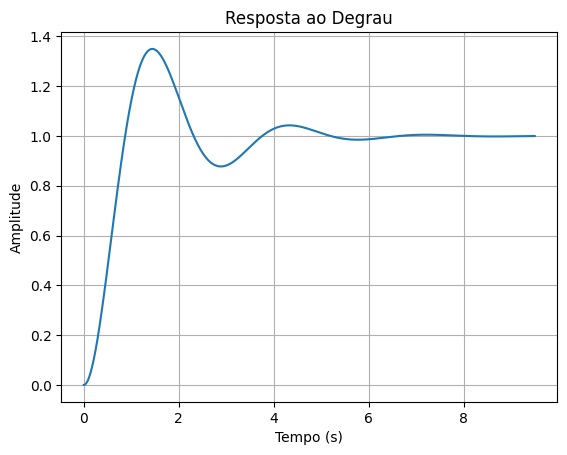

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação da resposta ao degrau
t, y = ctrl.step_response(H_z)

# Plotar a resposta ao degrau
plt.figure()
plt.plot(t, y)
plt.title('Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Calculando Overshoot e Tempo de acomodação:

In [10]:
# calcular overshot
y_final = y[-1]
overshoot = (np.max(y) - y_final) / y_final * 100

# calcular tempo de acomodação
tolerance = 0.02
settling_time = t[np.where(np.abs(y - y_final) <= tolerance * y_final)[0][-1]]

print(f"Overshoot (Mp%): {overshoot:.2f}%")
print(f"Tempo de acomodação (Ta): {settling_time:.2f} segundos")

Overshoot (Mp%): 34.99%
Tempo de acomodação (Ta): 9.50 segundos


3) Seja um sistema dinâmico representado pela seguinte resposta ao impulso:
h = [2, -5, -3, -1, 1]


Pede-se:

a) Calcular (manualmente) a saída desse sistema para um sinal de entrada x = [1, 2, 3, 1, -1, -2].


Memorial de cálculo:

y[0]=1⋅2= 2

y[1]=1⋅−5+2⋅2=−5+4= −1

y[2]=1⋅−3+2⋅−5+3⋅2=−3−10+6=−7

y[3]=1⋅−1+2⋅−3+3⋅−5+1⋅2=−1−6−15+2=−20

y[4]=1⋅1+2⋅−1+3⋅−3+1⋅−5+(−1)⋅2=1−2−9−5−2=−17

y[5]=2⋅1+3⋅−1+1⋅−3+(−1)⋅−5+(−2)⋅2=2−3−3+5−4=−3

y[6]=3⋅1+1⋅−1+(−1)⋅−3+(−2)⋅−5=3−1+3+10=15

y[7]=1⋅1+(−1)⋅−1+(−2)⋅−3=1+1+6=8

y[8]=(−1)⋅1+(−2)⋅−1=−1+2=1

y[9]=(−2)⋅1=−2

Sinal de saída: y = [2,−1,−7,−20,−17,−3,15,8,1,−2]

b) Calcular (usando o Python) a saída desse sistema para o mesmo sinal do item a.

In [12]:
# Definir a entrada x e a resposta ao impulso h
x = [1, 2, 3, 1, -1, -2]
h = [2, -5, -3, -1, 1]

# Calcular a convolução de x e h
y = np.convolve(x, h)

print(f"Entrada (x): {x}")
print(f"Resposta ao impulso (h): {h}")
print(f"Sinal de saída: y = {y}")

Entrada (x): [1, 2, 3, 1, -1, -2]
Resposta ao impulso (h): [2, -5, -3, -1, 1]
Sinal de saída: y = [  2  -1  -7 -20 -17  -3  15   8   1  -2]
